In [1]:
#TOPIC : CREDIT CARD FRAUD DETECTION
'''
COMPONENTS / MODULES --
1. RANDOM FOREST
2. CONFUSION MATRIX
'''

'\nTEAM ---\n\nSOUBHIK SINHA (19BIT0303)\nROHIT K (19BIT0318)\nADARSH KUMAR SINGH (19BIT0253)\n'

In [2]:
#Lets import all the Important / required libraries. If you can't 
#run a particular libray , that means it's not installed. Simply
#go to cmd and run --> pip install your_package_name. For this
#pip should be installed. 
import pandas as ps
import numpy as ny
import matplotlib.pyplot as pypt
from matplotlib import gridspec
import seaborn as sbn

In [3]:
#Lets load the dataset. The dataset shall be in the form of .CSV file.
'''
Dataset taken from kaggle --- 
Link : https://www.kaggle.com/mlg-ulb/creditcardfraud
'''

cred = ps.read_csv("D:\Projects\UnderGradProjects\Credit Card Fraud Detection System _ A Comparison study on various Machine Learning and Deep Learning Algorithms\creditcard.csv")

In [4]:
#Lets see what's inside the dataset
cred.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
#Data in the dataset should be given some shape
print(cred.shape)
print(cred.describe())

(284807, 31)
                Time            V1            V2            V3            V4  \
count  284807.000000  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean    94813.859575  1.759061e-12 -8.251130e-13 -9.654937e-13  8.321385e-13   
std     47488.145955  1.958696e+00  1.651309e+00  1.516255e+00  1.415869e+00   
min         0.000000 -5.640751e+01 -7.271573e+01 -4.832559e+01 -5.683171e+00   
25%     54201.500000 -9.203734e-01 -5.985499e-01 -8.903648e-01 -8.486401e-01   
50%     84692.000000  1.810880e-02  6.548556e-02  1.798463e-01 -1.984653e-02   
75%    139320.500000  1.315642e+00  8.037239e-01  1.027196e+00  7.433413e-01   
max    172792.000000  2.454930e+00  2.205773e+01  9.382558e+00  1.687534e+01   

                 V5            V6            V7            V8            V9  \
count  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05  2.848070e+05   
mean   1.649999e-13  4.248366e-13 -3.054600e-13  8.777971e-14 -1.179749e-12   
std    1.380247e+00  1.332271

In [7]:
#Now let us check how many fraud cases have dominated the loaded dataset
valid_trans = cred[cred['Class'] == 0]
fraud_trans = cred[cred['Class'] == 1]
ol_frac = len(fraud_trans)/float(len(valid_trans))
print(ol_frac)
print('No. of Valid Transactions : {}'.format(len(cred[cred['Class'] == 1])))
print('No. of Fraudulent Transactions : {}'.format(len(cred[cred['Class'] == 0])))

#adding {} in the above sentences mean the result will be displayed there. (For the above code)

0.0017304750013189597
No. of Valid Transactions : 492
No. of Fraudulent Transactions : 284315


In [8]:
# So if we take out the percentage of the fraudulent cases among the total transactions , 
#we shall find that --

In [11]:
print((492/284315)*100)

0.17304750013189596


In [12]:
#Approximately 0.17% of all the transactions are Fraudulent. But , we have a problem here - 
#The data in the dataset provided is highly unbalanced. Lets just implement without balancing #it. Later we shall think over it.

print("FRAUDULENT TRANSACTION AMOUNT DETAILS ARE AS SHOWN BELOW ---")
fraud_trans.Amount.describe() 

FRAUDULENT TRANSACTION AMOUNT DETAILS ARE AS SHOWN BELOW ---


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [14]:
#Lets print for the Normal transaction (The valid ones)

print("VALID TRANSACTION AMOUNT DETAILS ---")
valid_trans.Amount.describe()

VALID TRANSACTION AMOUNT DETAILS ---


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

In [15]:
#Have a look over the mean pelf transaction for the Fraudulet cases - they are much higher 
#than the valid ones.

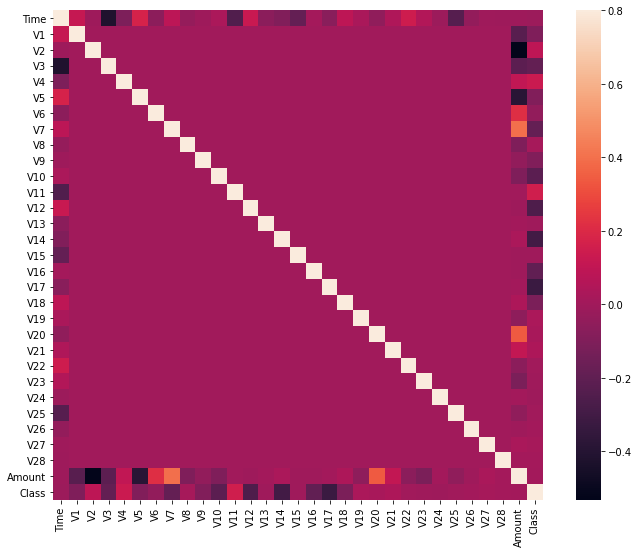

In [18]:
#Lets create a Correlation Matrix. 

'''
What is a Correlation Matrix ?

A Correlation matrix is a table showing correlation coefficients between sets of variables.
'''

cormatx = cred.corr()
figure = pypt.figure(figsize = (12,9))
sbn.heatmap(cormatx,vmax = 0.8 , square = True)
pypt.show()

In [19]:
#If you see the two consecuive coloured blocks of every feature (from V1,V2,V3....to amount and class) , you will see there is not much correlation among the features. For example : just #have a look at V2 & V5 - they are highly negatively corrlated. Also check V20 and Amount. But #most of the features are not correlated. (See the blank pink space inside and the #color-depiction-graph on the right)

In [20]:
#Lets separate teh values of X-axis and Y-axis from the given / loaded dataset
Y = cred["Class"]
X = cred.drop(['Class'],axis = 1)
print(Y.shape)
print(X.shape)

#Let us retrieve the values
y_Data = Y.values
x_Data = X.values

(284807,)
(284807, 30)


In [21]:
#As the dataset is quite big , why not we divide this in two parts - one for training the model
#and one for testing the model (that is trained).

from sklearn.model_selection import train_test_split

#from here , we shall divide the dataset for the above mentioned
x_Train, x_Test, y_Train, y_Test = train_test_split(
        x_Data, y_Data, test_size = 0.2, random_state = 42)

In [22]:
from sklearn.ensemble import RandomForestClassifier
ran_for_classfr = RandomForestClassifier()
ran_for_classfr.fit(x_Train, y_Train)

#Predicting the possible results
y_Predict = ran_for_classfr.predict(x_Test)

In [27]:
#Lets apply the metrics for evluation
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import classification_report, accuracy_score 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score
  
precision = precision_score(y_Test, y_Predict)
print("The precision is : {}".format(precision))

accuracy = accuracy_score(y_Test, y_Predict)
print("The accuracy is : {}".format(accuracy))
  
f1_score = f1_score(y_Test, y_Predict)
print("The F1-Score is : {}".format(f1_score))
    
mat_corf = matthews_corrcoef(y_Test, y_Predict)
print("The Matthews correlation coefficient is : {}".format(mat_corf))

recall = recall_score(y_Test, y_Predict)  # Recall is also known as Sensitivity
print("The recall is : {}".format(recall))

The precision is : 0.9506172839506173
The accuracy is : 0.9995611109160493
The F1-Score is : 0.8603351955307262
The Matthews correlation coefficient is : 0.8640351019464072
The recall is : 0.7857142857142857


In [ ]:
'''
If Converted the above taken out metrics values in percentage ---

Precision : 95.1%
Accuracy : 99.9% (That's almost 100% !!!)
F1_Score : 86.0%
Matthews Correlation Coefficient : 86.4%
Recall (OR Sensitivity) : 78.6%
'''

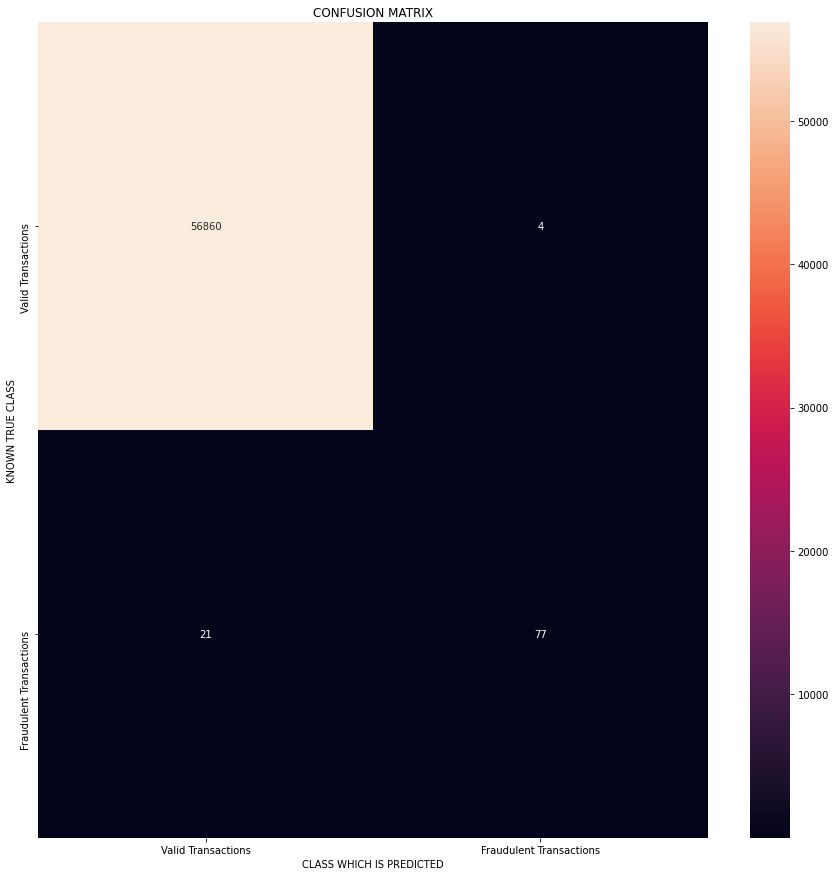

In [28]:
#Lets have a look in Confusion Matrix
LABELS = ['Valid Transactions', 'Fraudulent Transactions']
confusion_matrix = confusion_matrix(y_Test, y_Predict)
pypt.figure(figsize =(15, 15))
sbn.heatmap(confusion_matrix, xticklabels = LABELS, 
            yticklabels = LABELS, annot = True, fmt ="d");
pypt.title("CONFUSION MATRIX")
pypt.ylabel('KNOWN TRUE CLASS')
pypt.xlabel('CLASS WHICH IS PREDICTED')
pypt.show()

In [ ]:
#Thus , we have the confusion matrix of testing and predicting values